In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import scipy.stats as stats
# from scipy.stats import t
from scipy.stats import ttest_ind

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Analytics & Data Science/Probability II/Project/insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 1. Analisis Deskriptif Statistik

##Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non perokok?

In [4]:
# Extracting charges data for individuals who are smokers
charges_smoker = data[data.smoker == 'yes']['charges']

# Extracting charges data for individuals who are non-smokers
charges_non_smoker = data[data.smoker == 'no']['charges']

# Calculating the mean charges for smokers
mean_charges_smoker = charges_smoker.mean()

# Calculating the mean charges for non-smokers
mean_charges_non_smoker = charges_non_smoker.mean()

# Calculating the median charges for smokers
median_charges_smoker = charges_smoker.median()

# Calculating the median charges for non-smokers
median_charges_non_smoker = charges_non_smoker.median()

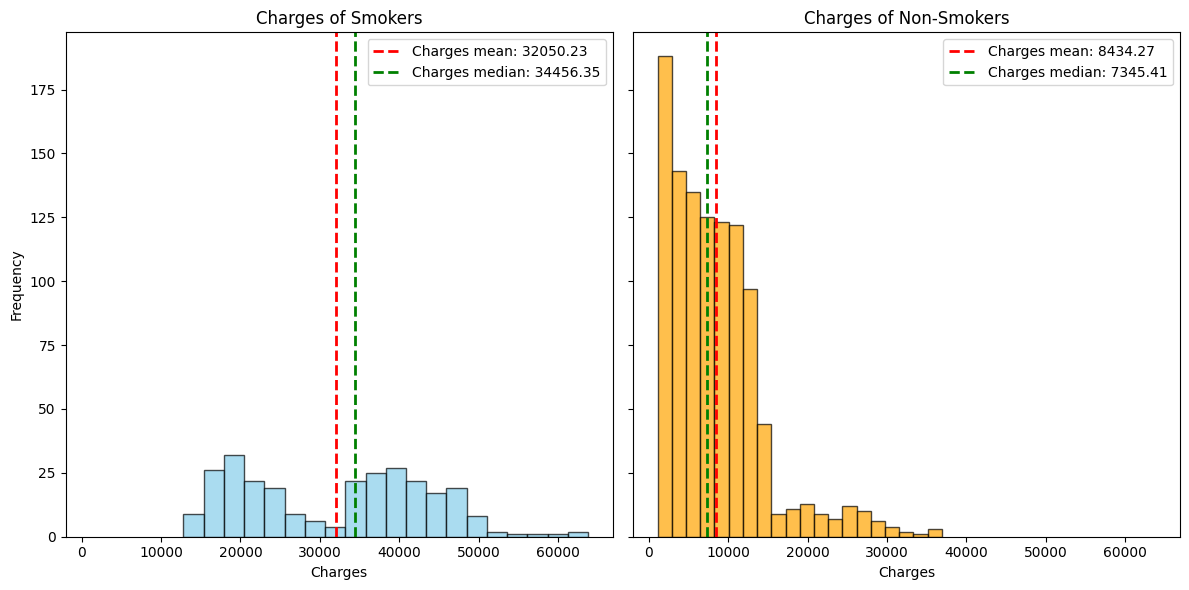

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Create charges histogram of smokers
ax1.hist(charges_smoker, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
# Add a vertical dashed line representing the mean charges for smokers
ax1.axvline(mean_charges_smoker, color='red', linestyle='dashed', linewidth=2,
            label=f'Charges mean: {mean_charges_smoker:.2f}')
# Add a vertical dashed line representing the median charges for smokers
ax1.axvline(median_charges_smoker, color='green', linestyle='dashed',
            linewidth=2, label=f'Charges median: {median_charges_smoker:.2f}')

ax1.set_xlabel('Charges')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.set_title('Charges of Smokers')


# Create charges histogram of non smokers
ax2.hist(charges_non_smoker, bins=20, color='orange', edgecolor='black', alpha=0.7)
# Add a vertical dashed line representing the mean charges for non smokers
ax2.axvline(mean_charges_non_smoker, color='red', linestyle='dashed', linewidth=2,
            label=f'Charges mean: {mean_charges_non_smoker:.2f}')
# Add a vertical dashed line representing the median charges for non smokers
ax2.axvline(median_charges_non_smoker, color='green', linestyle='dashed',
            linewidth=2, label=f'Charges median: {median_charges_non_smoker:.2f}')
ax2.set_xlabel('Charges')
ax2.legend()
ax2.set_title('Charges of Non-Smokers')


plt.tight_layout()
plt.show()

##Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

In [15]:
# Extract charges data for individuals who are smokers
smoker_data = data[data.smoker == 'yes']['charges']

# Extract charges data for individuals who are non-smokers
non_smoker_data = data[data.smoker == 'no']['charges']

# Calculate the variance of charges for smokers
variance_smoker = smoker_data.var()

# Calculate the variance of charges for non smokers
variance_non_smoker = non_smoker_data.var()

print(f"variansi tagihan perokok adalah {variance_smoker:.2f}")
print(f"variansi tagihan bukan perokok adalah {variance_non_smoker:.2f}")

variansi tagihan perokok adalah 133207311.21
variansi tagihan bukan perokok adalah 35925420.50


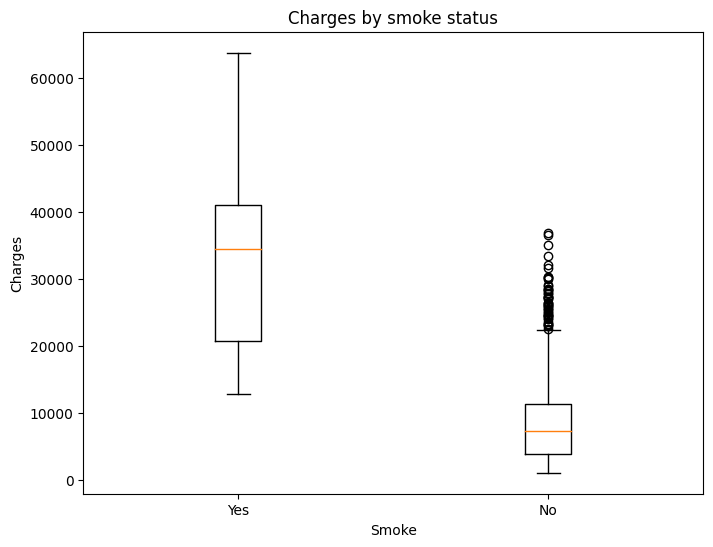

In [6]:
plt.figure(figsize=(8, 6))

# Create a box plot for charges of smokers and position it at x=1 on the x-axis
plt.boxplot(smoker_data, positions=[1], labels=['Yes'], sym='o')

# Create a box plot for charges of non-smokers and position it at x=2 on the x-axis
plt.boxplot(non_smoker_data, positions=[2], labels=['No'], sym='o')

plt.xlabel('Smoke')
plt.ylabel('Charges')
plt.title('Charges by smoke status')
plt.show()

##Berapa rata-rata nilai BMI dari yang merokok?

In [7]:
# Extract BMI data for individuals who are smokers
bmi_smoke = (data[data['smoker']=='yes']["bmi"])

# Calculate the mean BMI for smokers
bmi_mean_smoke = bmi_smoke.mean()

# Calculate the median BMI for smokers
bmi_median_smoke = bmi_smoke.median()

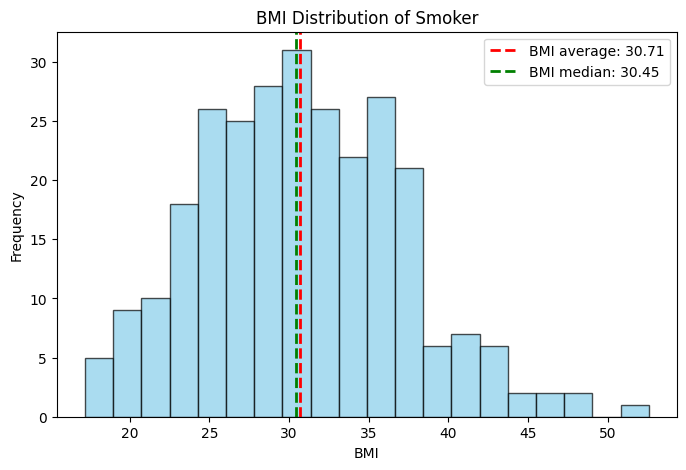

In [8]:
plt.figure(figsize=(8, 5))


# Create a histogram of BMI data for smokers
plt.hist(bmi_smoke, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add a vertical dashed line representing the mean BMI for smokers
plt.axvline(bmi_mean_smoke, color='red', linestyle='dashed', linewidth=2,
            label=f'BMI average: {bmi_mean_smoke:.2f}')

# Add a vertical dashed line representing the median BMI for smokers
plt.axvline(bmi_median_smoke, color='green', linestyle='dashed', linewidth=2,
            label=f'BMI median: {bmi_median_smoke:.2f}')

plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.title('BMI Distribution of Smoker')
plt.show()

##Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?

In [9]:
# Extract data for females who are smokers
female_smoker = data[(data.sex=='female') & (data.smoker=='yes')]

# Extract data for males who are smokers
male_smoker = data[(data.sex=='male') & (data.smoker=='yes')]

# Calculate the mean age for female smokers
age_mean_female_smoker = female_smoker['age'].mean()

# Calculate the median age for female smokers
age_median_female_smoker = female_smoker['age'].median()

# Calculate the mean age for male smokers
age_mean_male_smoker = male_smoker['age'].mean()

# Calculate the median age for male smokers
age_median_male_smoker = male_smoker['age'].median()

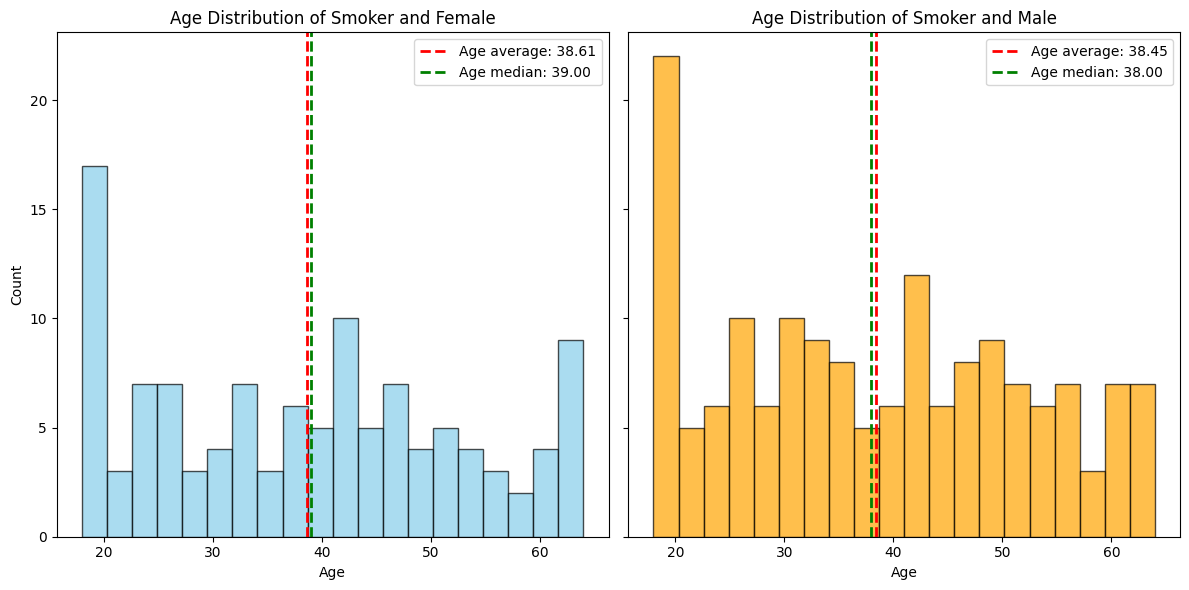

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot a histogram of age distribution for female smokers
ax1.hist(female_smoker['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
# Add a vertical dashed line representing the mean age for female smokers
ax1.axvline(age_mean_female_smoker, color='red', linestyle='dashed', linewidth=2,
            label=f'Age average: {age_mean_female_smoker:.2f}')
# Add a vertical dashed line representing the median age for female smokers
ax1.axvline(age_median_female_smoker, color='green', linestyle='dashed',
            linewidth=2, label=f'Age median: {age_median_female_smoker:.2f}')

ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.legend()
ax1.set_title('Age Distribution of Smoker and Female')

# Plot a histogram of age distribution for male smokers
ax2.hist(male_smoker['age'], bins=20, color='orange', edgecolor='black', alpha=0.7)
# Add a vertical dashed line representing the mean age for male smokers
ax2.axvline(age_mean_male_smoker, color='red', linestyle='dashed', linewidth=2,
            label=f'Age average: {age_mean_male_smoker:.2f}')
# Add a vertical dashed line representing the median age for male smokers
ax2.axvline(age_median_male_smoker, color='green', linestyle='dashed',
            linewidth=2, label=f'Age median: {age_median_male_smoker:.2f}')

ax2.set_xlabel('Age')
ax2.legend()
ax2.set_title('Age Distribution of Smoker and Male')


plt.tight_layout()
plt.show()

##Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok yang BMI-nya di atas 25 atau non perokok yang BMI-nya di atas 25?

In [11]:
# Extract charges data for individuals who are smokers and have a BMI greater than 25
charges_smoke_overweight = (data[(data['smoker']=='yes') &(data['bmi']>25)]["charges"])

# Extract charges data for individuals who are non-smokers and have a BMI greater than 25
charges_non_smoke_overweight = (data[(data['smoker']=='no') &(data['bmi']>25)]["charges"])

# Calculate the mean charges for smokers with BMI greater than 25
charges_mean_smoke_overweight = charges_smoke_overweight.mean()

# Calculate the median charges for smokers with BMI greater than 25
charges_median_smoke_overweight = charges_smoke_overweight.median()

# Calculate the mean charges for non-smokers with BMI greater than 25
charges_mean_non_smoke_overweight = charges_non_smoke_overweight.mean()
# Calculate the median charges for non-smokers with BMI greater than 25
charges_median_non_smoke_overweight = charges_non_smoke_overweight.median()

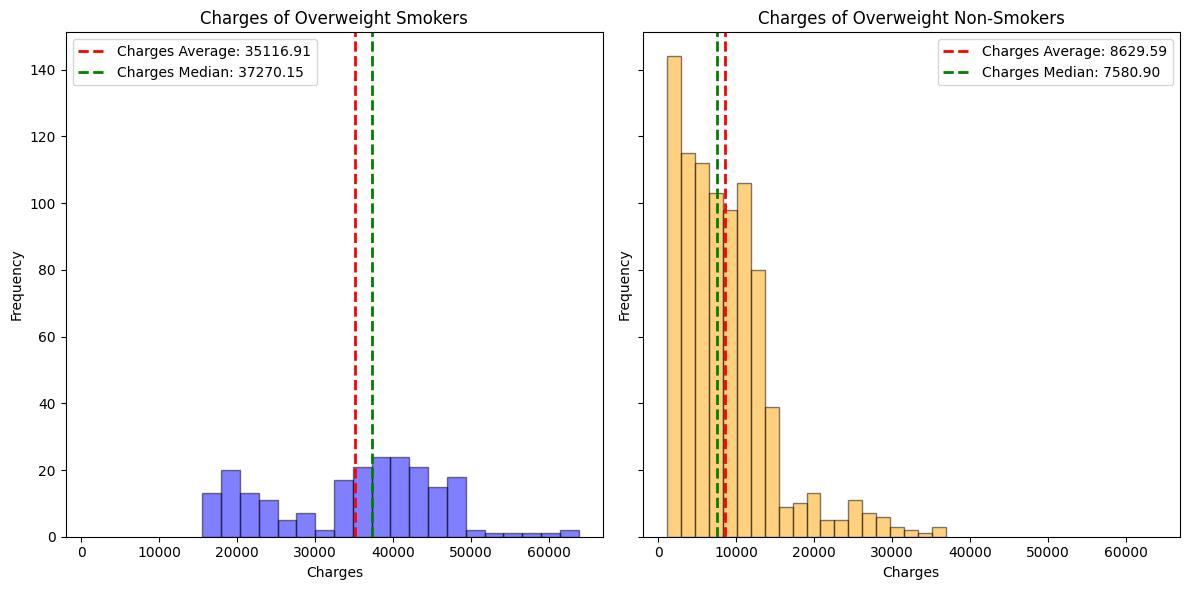

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)

# Plot a histogram of charges for overweight smokers
axes[0].hist(charges_smoke_overweight, bins=20, alpha=0.5, color='blue',
             edgecolor='black')
# Add a vertical dashed line representing the mean charges for overweight smokers
axes[0].axvline(charges_mean_smoke_overweight, color='red', linestyle='dashed',
                linewidth=2, label=f'Charges Average: {charges_mean_smoke_overweight:.2f}')
# Add a vertical dashed line representing the median charges for overweight smokers
axes[0].axvline(charges_median_smoke_overweight, color='green', linestyle='dashed',
                linewidth=2, label=f'Charges Median: {charges_median_smoke_overweight:.2f}')

axes[0].set_xlabel('Charges')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Charges of Overweight Smokers')
axes[0].legend()

# Plot a histogram of charges for overweight non-smokers
axes[1].hist(charges_non_smoke_overweight, bins=20, alpha=0.5, color='orange',
             edgecolor='black')
# Add a vertical dashed line representing the mean charges for overweight non-smokers
axes[1].axvline(charges_mean_non_smoke_overweight, color='red', linestyle='dashed',
                linewidth=2, label=f'Charges Average: {charges_mean_non_smoke_overweight:.2f}')
# Add a vertical dashed line representing the median charges for overweight non-smokers
axes[1].axvline(charges_median_non_smoke_overweight, color='green', linestyle='dashed',
                linewidth=2, label=f'Charges Median: {charges_median_non_smoke_overweight:.2f}')

axes[1].set_xlabel('Charges')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Charges of Overweight Non-Smokers')
axes[1].legend()

plt.tight_layout()
plt.show()

#2. Analisis Variabel Diskrit

##Gender mana yang memiliki tagihan paling tinggi?

In [13]:
# Separating the dataset into two groups: females and males, based on the 'sex' column
female_charges = data[data.sex=='female']["charges"]
male_charges = data[data.sex=='male']["charges"]

# Calculating the mean charges for each group
mean_female_charges = female_charges.mean()
mean_male_charges = male_charges.mean()

# Calculating the median charges for each group
median_female_charges = female_charges.median()
median_male_charges = male_charges.median()

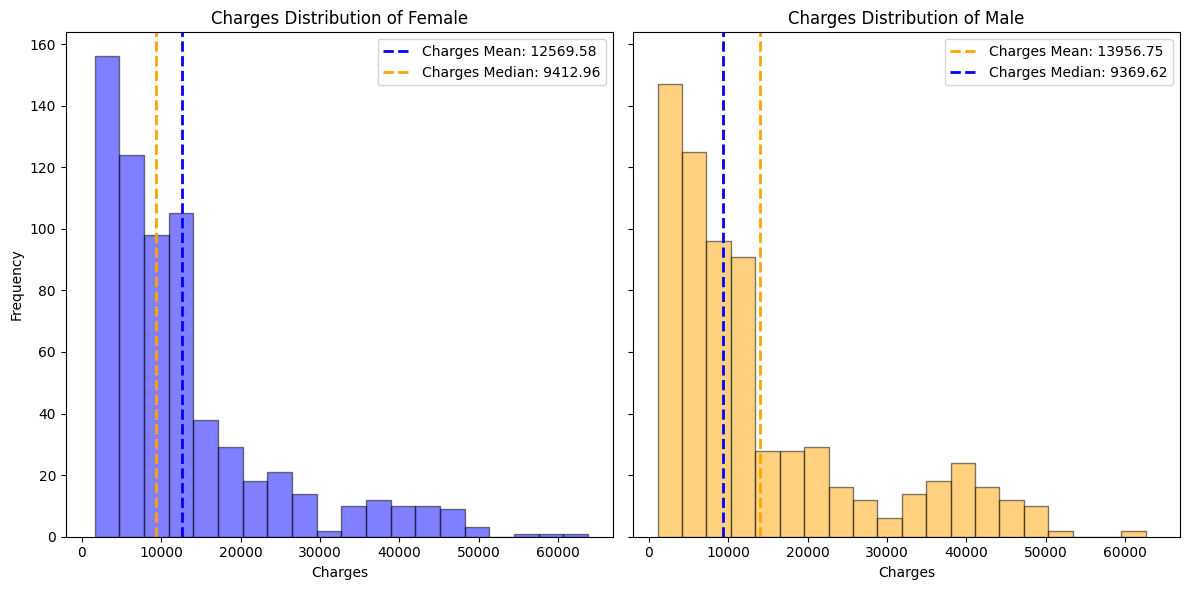

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Plotting the histogram of female charges
ax1.hist(female_charges, bins=20, alpha=0.5, color='blue', edgecolor='black')

# Adding dashed vertical lines to represent the mean and median charges for females
ax1.axvline(mean_female_charges, color='blue', linestyle='dashed', linewidth=2,
            label=f'Charges Mean: {mean_female_charges:.2f}')
ax1.axvline(median_female_charges, color='orange', linestyle='dashed', linewidth=2,
            label=f'Charges Median: {median_female_charges:.2f}')

ax1.set_xlabel('Charges')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.set_title('Charges Distribution of Female')

# Plotting the histogram of male charges
ax2.hist(male_charges, bins=20, alpha=0.5, color='orange', edgecolor='black')

# Adding dashed vertical lines to represent the mean and median charges for males
ax2.axvline(mean_male_charges, color='orange', linestyle='dashed', linewidth=2,
            label=f'Charges Mean: {mean_male_charges:.2f}')
ax2.axvline(median_male_charges, color='blue', linestyle='dashed', linewidth=2,
            label=f'Charges Median: {median_male_charges:.2f}')

ax2.set_xlabel('Charges')
ax2.legend()
ax2.set_title('Charges Distribution of Male')


plt.tight_layout()
plt.show()

##Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [16]:
# Count the number of females who are smokers
female_smoker = data[(data.sex == 'female') & (data.smoker == 'yes')].shape[0]

# Count the total number of smokers in the dataset
smoker = data[data.smoker == 'yes'].shape[0]

# Calculate the probability that a person is female given that they are a smoker
female_given_smoker = female_smoker/smoker

print(f"Peluang seseorang perempuan diketahui dia perokok adalah {female_given_smoker:.2f}")

Peluang seseorang perempuan diketahui dia perokok adalah 0.42


##Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [17]:
# Count the number of males who are smokers
male_smoker = data[(data.sex == 'male') & (data.smoker == 'yes')].shape[0]

# Calculate the probability that a person is male given that they are a smoker
male_given_smoker = male_smoker/smoker

print(f"Peluang seseorang laki-laki diketahui dia perokok adalah {male_given_smoker:.2f}")

Peluang seseorang laki-laki diketahui dia perokok adalah 0.58


##Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [18]:
# Calculate the total number of data points in the dataset
total_data = data.shape[0]

# Count the number of occurrences for each value in the 'region' column
region_counts = data['region'].value_counts()

region_counts

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [19]:
# Calculate the proportions of insurance users in each region as a percentage of the total data
region_proportions = region_counts / total_data * 100
region_proportions

southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64

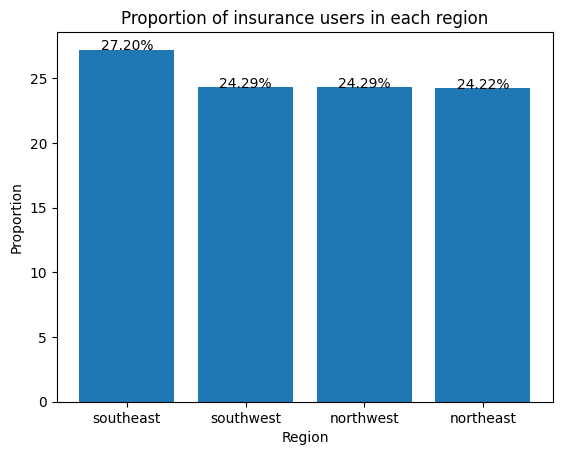

In [20]:
# Create a bar chart to visualize the proportions of users in each region
plt.bar(region_proportions.index, region_proportions.values)

# Add text labels above each bar to display the percentage value
for i, proportion in enumerate(region_proportions):
    plt.text(i, proportion + 0.001, f'{proportion:.2f}%', ha='center', fontsize=10)

plt.title('Proportion of insurance users in each region')
plt.xlabel('Region')
plt.ylabel('Proportion')

plt.show()

##Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

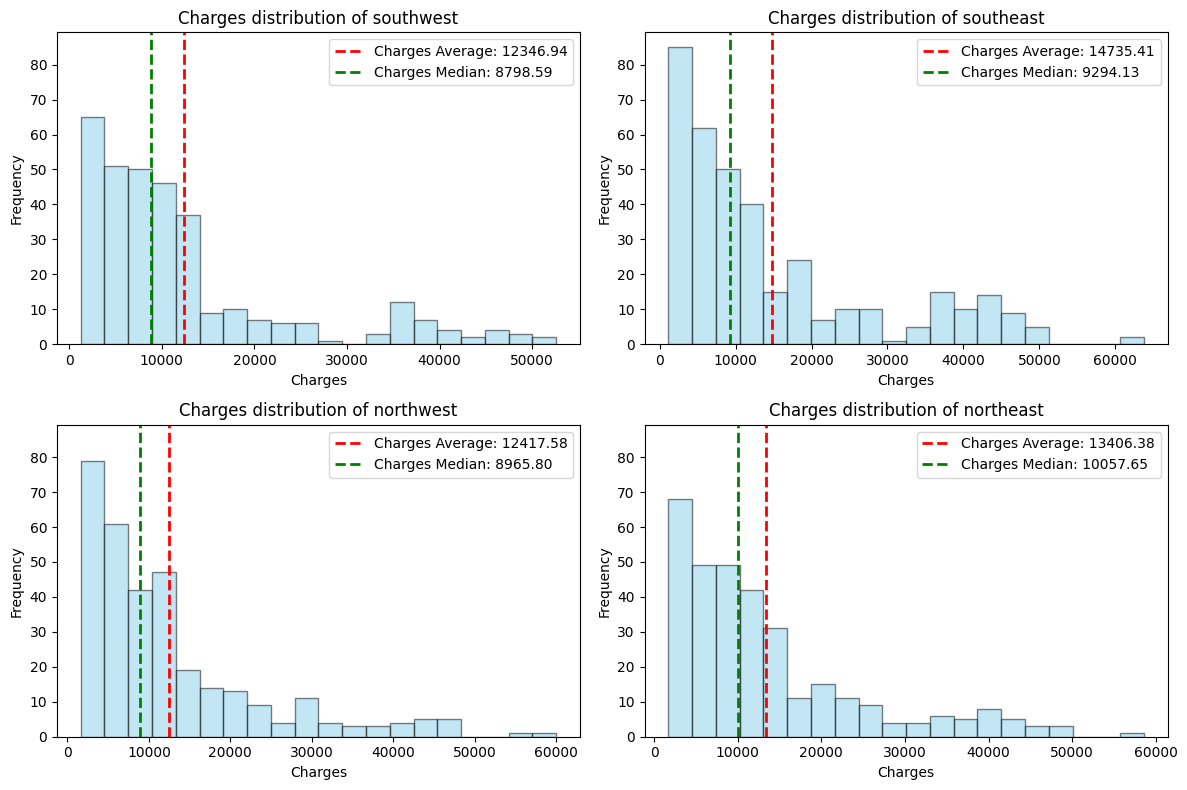

In [22]:
# Get unique region values from the 'region' column in the dataset
regions = data['region'].unique()

# Initialize a variable to keep track of the maximum y-axis limit across subplots
max_y = 0

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loop through each unique region to create individual histograms
for i, region in enumerate(regions):
    # Calculate the row and column indices for the current subplot
    row, col = divmod(i, 2)
    ax = axs[row, col]

    # Filter the dataset for data corresponding to the current region
    region_data = data[data['region'] == region]['charges']

    # Create a histogram of charges data for the current region
    ax.hist(region_data, bins=20, alpha=0.5, color='skyblue',
            edgecolor='black')

    # Calculate the average and median charges for the current region
    avg = region_data.mean()
    median = region_data.median()

    # Update the maximum y-axis limit if the current subplot has a higher limit
    current_max_y = ax.get_ylim()[1]
    if current_max_y > max_y:
        max_y = current_max_y

    ax.set_title(f'Charges distribution of {region}')
    ax.set_xlabel('Charges')
    ax.set_ylabel('Frequency')

    # Add dashed vertical lines to represent the average and median charges
    ax.axvline(avg, color='red', linestyle='dashed', linewidth=2,
               label=f'Charges Average: {avg:.2f}')
    ax.axvline(median, color='green', linestyle='dashed', linewidth=2,
               label=f'Charges Median: {median:.2f}')

    ax.legend()

# Ensure that all subplots have the same y-axis limit for consistent comparison
for ax in axs.flatten():
    ax.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

#3. Analisis variabel continue

##1. Mana yang lebih mungkin terjadi:
Seseorang dengan **BMI diatas 25 mendapatkan tagihan kesehatan di atas 16.7k** atau seseorang dengan **BMI dibawah 25 mendapatkan tagihan kesehatan di atas 16.7k**

In [23]:
# Filter the dataset to select individuals with BMI above 25
above_25 = data[data['bmi'] > 25]

# Calculate the probability of individuals with BMI above 25 receiving bills above 16,700
probability_above_25 = len(above_25[above_25['charges'] > 16700]) / len(above_25)

# Filter the dataset to select individuals with BMI below or equal to 25
below_25 = data[data['bmi'] <= 25]

# Calculate the probability of individuals with BMI below 25 receiving bills above 16,700
probability_below_25 = len(below_25[below_25['charges'] > 16700]) / len(below_25)

print(f"Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k adalah {probability_above_25:.2f}")
print(f"Peluang seseorang dengan BMI di bawah 25 mendapatkan tagihan di atas 16.7k adalah {probability_below_25:.2f}")

Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k adalah 0.26
Peluang seseorang dengan BMI di bawah 25 mendapatkan tagihan di atas 16.7k adalah 0.21


##2. Mana yang lebih mungkin terjadi:
Seseorang **perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan di atas 16.7k** atau seseorang n**on perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k**

In [24]:
# Filter the dataset to select smokers with BMI above 25
smoker_above_25 = data[(data['smoker'] == 'yes') & (data['bmi'] > 25)]
# Calculate the probability of smokers with BMI above 25 receiving bills above 16,700
probability_charges_smoker_above_25 = (len(smoker_above_25[smoker_above_25['charges'] > 16700]) /
                                      len(smoker_above_25))

# Filter the dataset to select non-smokers with BMI above 25
non_smoker_above_25 = data[(data['smoker'] == 'no') & (data['bmi'] > 25)]
# Calculate the probability of non-smokers with BMI above 25 receiving bills above 16,700
probability_charges_non_smoker_above_25 = (len(non_smoker_above_25[non_smoker_above_25['charges'] > 16700]) /
                                          len(non_smoker_above_25))

print(f"Peluang seseorang perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k adalah {probability_charges_smoker_above_25:.2f}")
print(f"Peluang seseorang non perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k adalah {probability_charges_non_smoker_above_25:.2f}")

Peluang seseorang perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k adalah 0.98
Peluang seseorang non perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7k adalah 0.08


#4. Analisis korelasi dua variabel

In [25]:
# Calculate the covariance matrix for selected columns in the dataset
cov_matrix = data[['age', 'bmi', 'children', 'charges']].cov()

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
                   age           bmi    children       charges
age         197.401387      9.362337    0.719303  5.087480e+04
bmi           9.362337     37.187884    0.093795  1.464730e+04
children      0.719303      0.093795    1.453213  9.926742e+02
charges   50874.802298  14647.304426  992.674197  1.466524e+08


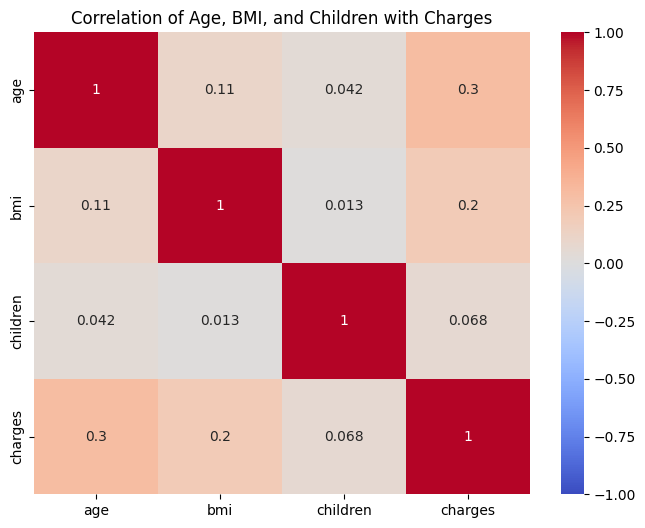

In [26]:
# Calculate the correlation matrix for selected columns in the dataset
corr_matrix = data[['age', 'bmi', 'children', 'charges']].corr()

# Create a figure and heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Age, BMI, and Children with Charges')
plt.show()

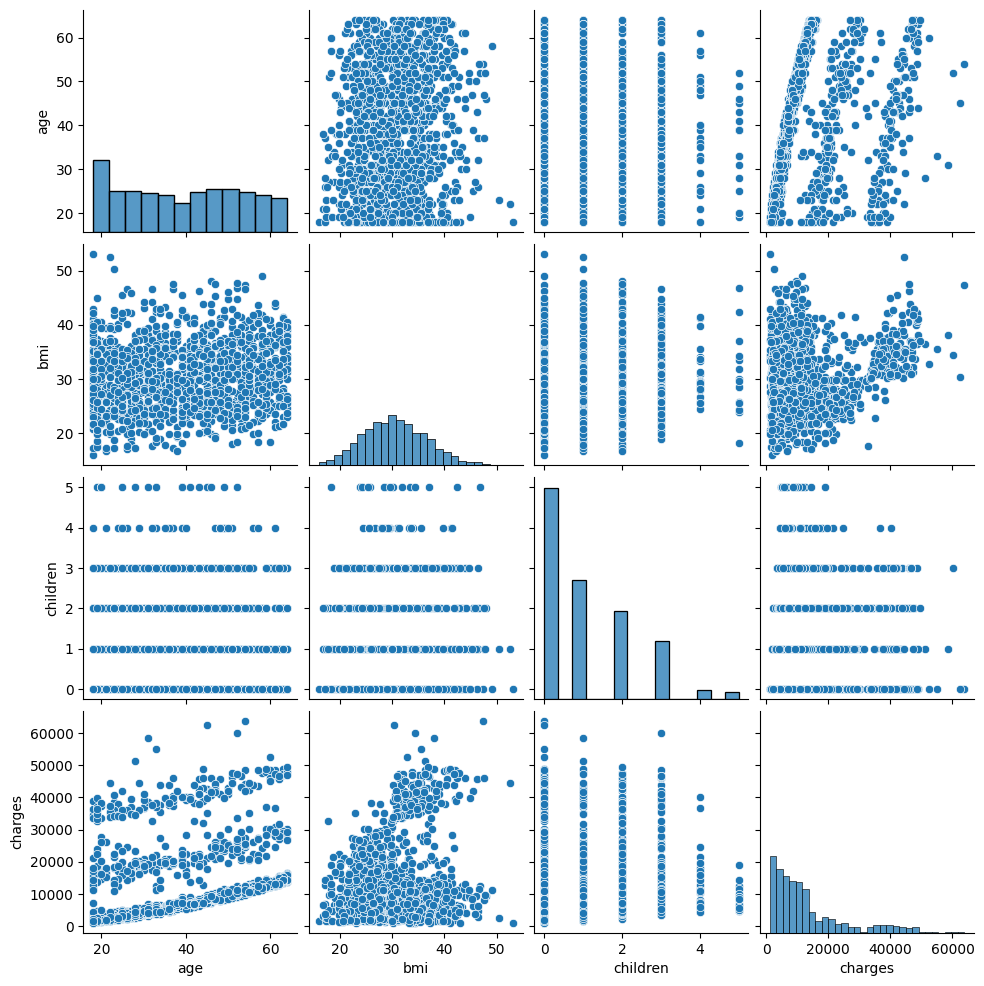

In [27]:
# Create a pairplot to visualize the relationships between the selected columns
sns.pairplot(data[['age', 'bmi', 'children', 'charges']])

#5. Pengujian Hipotesis

##Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok


$$H_0: \mu_{perokok} \leq \mu_{non \space perokok}$$
$$H_1: \mu_{perokok} > \mu_{non \space perokok}$$

In [28]:
alpha = 0.05 # Set the significance level (alpha) for hypothesis testing

In [29]:
# Select healthcare charges data for smokers and non-smokers
charges_smokers = data[data['smoker'] == 'yes']['charges']
charges_non_smokers = data[data['smoker'] == 'no']['charges']

In [30]:
# Calculate the variances of charges for smokers and non-smokers
np.var(charges_smokers), np.var(charges_non_smokers)

(132721153.13625307, 35891656.00316426)

In [31]:
# Perform an independent two-sample t-test with unequal variances
stat, p = ttest_ind(a = charges_smokers, b = charges_non_smokers, equal_var=False, alternative='greater')

print(f'Statistics = {stat}, p-value = {p}')

Statistics = 32.751887766341824, p-value = 2.94473222335849e-103


In [32]:
# Check if the p-value is less than the significance level (alpha)
if p < alpha:
    print("Tolak H0") # Reject the null hypothesis
else:
    print("Gagal tolak H0.") # Fail to reject the null hypothesis

Tolak H0


##proporsi perokok laki-laki lebih besar dari perempuan


$$ p_1 = perokok \space laki-laki $$
$$ p_2 = perokok \space perempuan $$

$$ H_0 : p_1 \leq p_2$$
$$ H_a : p_1 > p_2$$

In [41]:
alpha = 0.05

In [33]:
# Calculate the total number of males and females in the dataset
total_male = data[data.sex == 'male'].shape[0]
total_female = data[data.sex == 'female'].shape[0]

# Calculate the total number of male and female smokers in the dataset
total_male_smoker = data[(data.sex == 'male') & (data.smoker == 'yes')].shape[0]
total_female_smoker = data[(data.sex == 'female') & (data.smoker == 'yes')].shape[0]

In [34]:
# Create arrays for the number of smokers and total sample sizes
number_of_smokers = np.array([total_male_smoker, total_female_smoker])
total_sample_sizes = np.array([total_male, total_female])

In [36]:
# Perform a proportions Z-test to compare the proportions of male and female smokers
(test_stat, p_value) = proportions_ztest(number_of_smokers, total_sample_sizes, alternative='larger')

print("uji statistik: ",test_stat)
print("p-value: ", p_value)

uji statistik:  2.7867402154855503
p-value:  0.002662057082160266


In [37]:
# Calculate the critical value (z_crit) for a one-tailed test at a significance level of 0.05
z_crit=stats.norm.ppf(1-0.05)

print(z_crit)

1.6448536269514722


<ipython-input-38-6c8813e72dc3>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


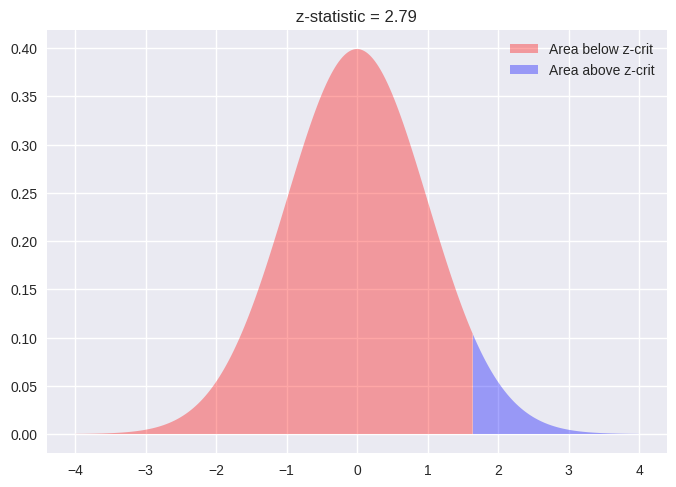

In [38]:
# Create a filled plot to visualize the critical regions
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,z_crit,0.01),
                 y1= stats.norm.pdf(np.arange(-4,z_crit,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-crit'
                 )

plt.fill_between(x=np.arange(z_crit,4,0.01),
                 y1= stats.norm.pdf(np.arange(z_crit,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35,
                 label= 'Area above z-crit')
plt.legend()
plt.title (f'z-statistic = {test_stat:.2f}');

In [40]:
# Check if the test statistic is greater than the critical value
if test_stat>z_crit:
    print("Tolak H0")
else:
    print("Gagal tolak H0")

Tolak H0


In [39]:
# Check if the p-value is less than alpha
if p_value<alpha:
  print("Tolak H0")
else:
  print("Gagal tolak H0")

Tolak H0


##Tagihan kesehatan dengan BMI di atas 25 lebih tinggi daripada tagihan kesehatan dengan BMI di bawah 25


$$H_0: \mu_{BMI \space di \space atas \space 25} \leq \mu_{BMI \space di \space bawah \space 25}$$
$$H_1: \mu_{BMI \space di \space atas \space 25} > \mu_{BMI \space di \space bawah \space 25}$$

In [4]:
alpha = 0.05 # Set the significance level (alpha) for hypothesis testing

In [5]:
# Select healthcare charges data for individuals with BMI above 25 and below 25
charges_above_25 = data[data['bmi'] > 25]['charges']
charges_under_25 = data[data['bmi'] < 25]['charges']

In [6]:
# Calculate the variances of charges for individuals above 25 and below 25 BMI
np.var(charges_above_25), np.var(charges_under_25)

(164579189.52132663, 56326859.63068616)

In [7]:
# Perform an independent two-sample t-test with unequal variances
stat, p = ttest_ind(a = charges_above_25, b = charges_under_25, equal_var=False, alternative='greater')

print(f'Statistics = {stat}, p-value = {p}')

Statistics = 5.929878344096734, p-value = 2.540448651580689e-09


In [9]:
# Check if the p-value is less than the significance level (alpha)
if p < alpha:
    print("Tolak H0")
else:
    print("Gagal tolak H0.")

Tolak H0
